In [23]:
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]
import seaborn as sns
sns.set_style("whitegrid")
import pandas as pd
import pickle
import os
import sys

In [24]:
path = "../distributions/cpu_architectures/"
os.listdir(path)

['MIPS64EL_reference',
 'PowerPC_reference',
 'i386_reference',
 'ARMEL_reference',
 'MIPSEL_reference',
 'PPC64_reference',
 'AMD64_reference',
 'ARM64_reference',
 'SH4_reference']

In [25]:
reference_dict = {}

for file in os.listdir(path):
    with open(path + file, "rb") as f:
        reference_dict[file] = pickle.load(f)

In [26]:
def plot_distributions(distributions, title=None):
    for code in distributions.values():
        sns.distplot(code,
                     norm_hist=True,     
                     kde=False,
                     hist_kws={'histtype':'step', 'cumulative': True, 'linewidth':2, 'alpha':1},
                     kde_kws={'cumulative': True},  
                     bins=256)
    plt.legend(distributions.keys(), loc="upper left")
    plt.title(title)
    plt.show()

<h3>All CPU Architecture Reference Distributions</h3>

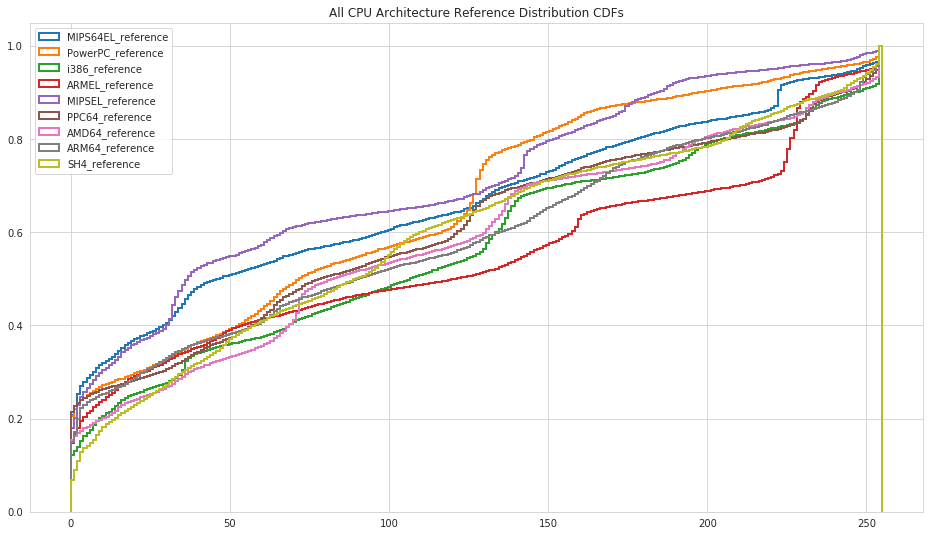

In [27]:
plot_distributions(reference_dict, "All CPU Architecture Reference Distribution CDFs")

<h1>By Family</h1>

<h2>x86</h2>

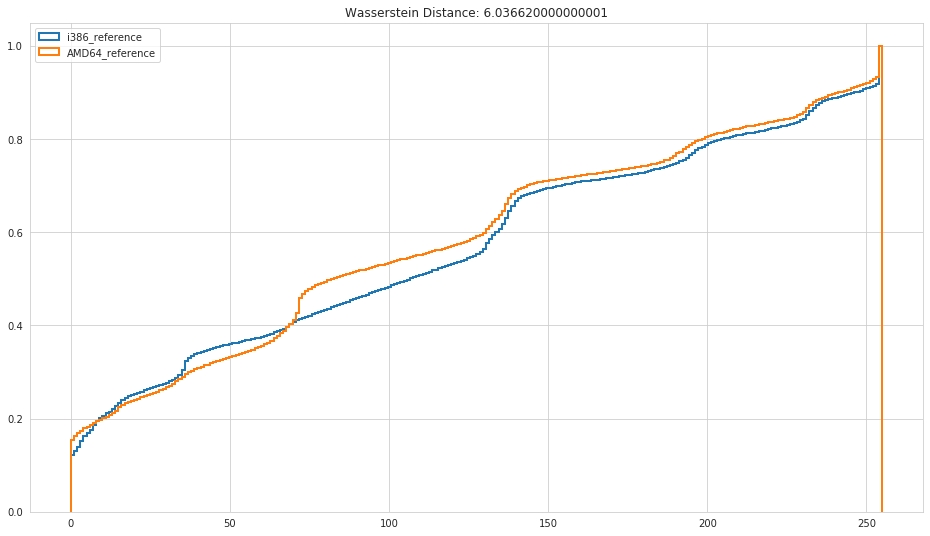

In [31]:
x86 = {x:reference_dict[x] for x in ['i386_reference', 'AMD64_reference']}
plot_distributions(x86, "Wasserstein Distance: %s" % str(stats.wasserstein_distance(x86["i386_reference"], x86["AMD64_reference"])))

<h2>ARM</h2>

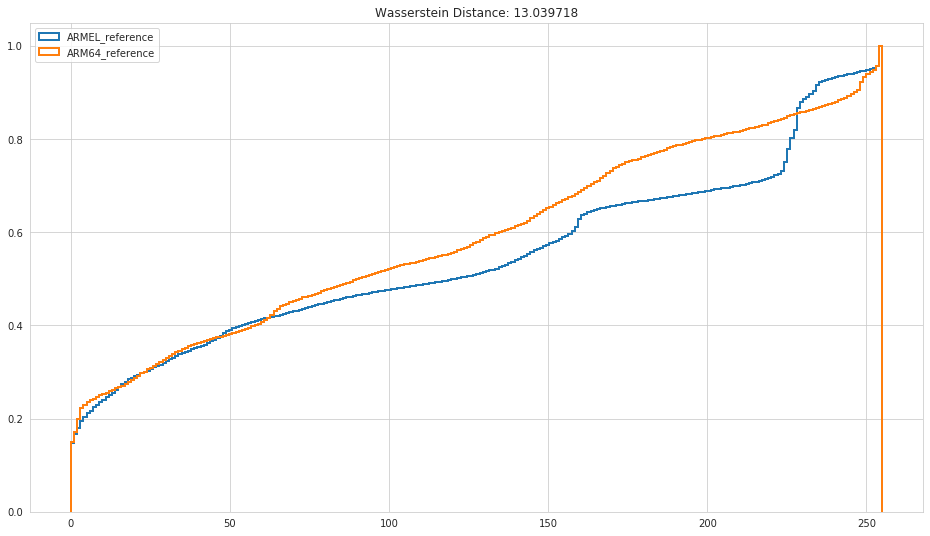

In [33]:
ARM = {x:reference_dict[x] for x in ['ARMEL_reference', 'ARM64_reference']}
plot_distributions(ARM, "Wasserstein Distance: %s" % str(stats.wasserstein_distance(ARM["ARMEL_reference"], ARM["ARM64_reference"])))

<h2>MIPS</h2>

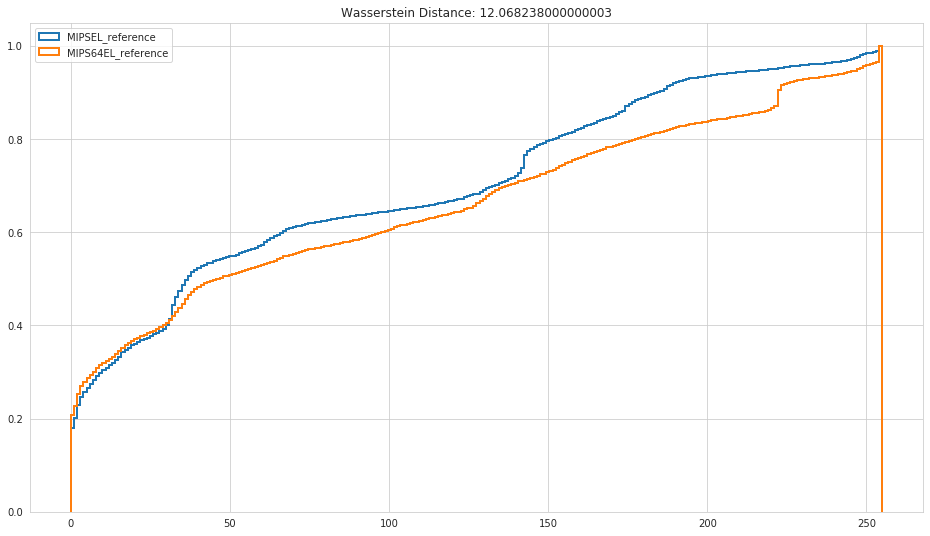

In [38]:
MIPS = {x:reference_dict[x] for x in ['MIPSEL_reference', 'MIPS64EL_reference']}
plot_distributions(MIPS, "Wasserstein Distance: %s" % str(stats.wasserstein_distance(MIPS["MIPSEL_reference"], MIPS["MIPS64EL_reference"])))

<h2>PowerPC</h2>

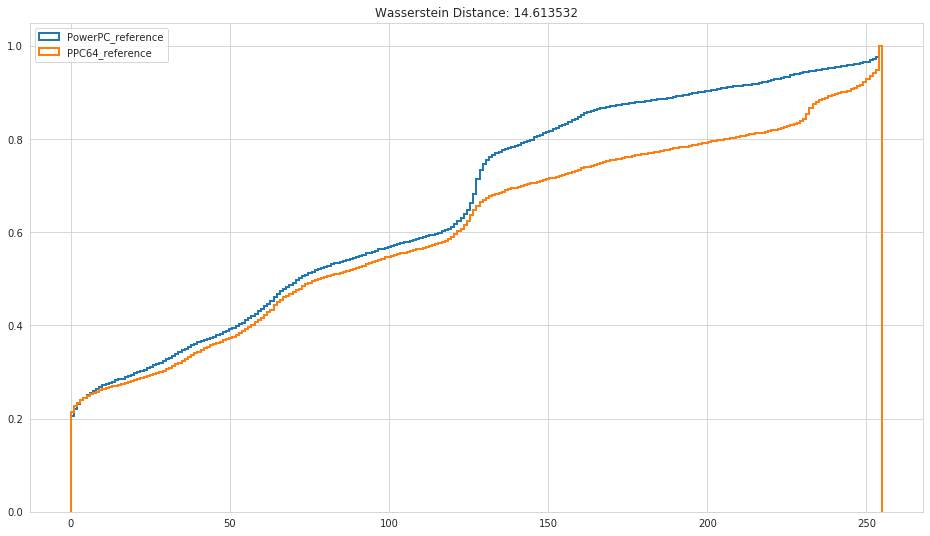

In [41]:
PPC = {x:reference_dict[x] for x in ['PowerPC_reference', 'PPC64_reference']}
plot_distributions(PPC, "Wasserstein Distance: %s" % str(stats.wasserstein_distance(PPC["PowerPC_reference"], PPC["PPC64_reference"])))

<h2>SH4</h2>

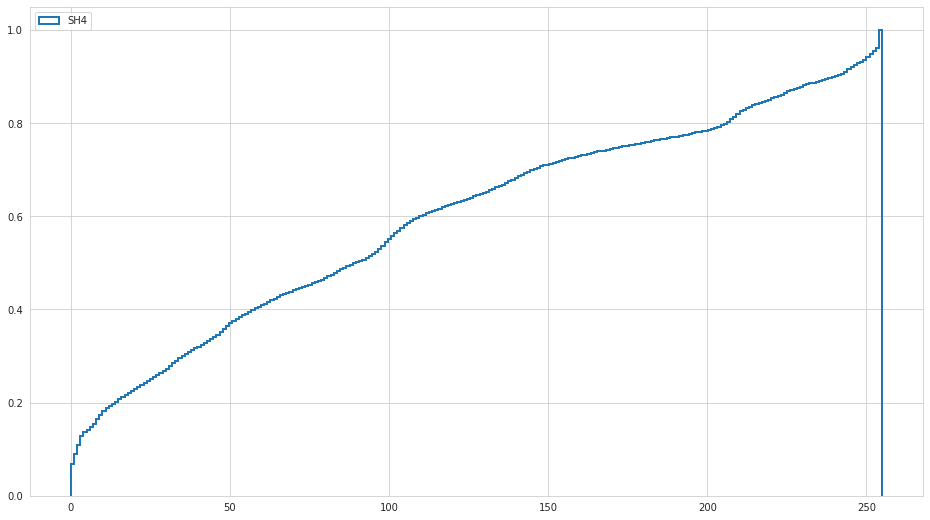

In [43]:
plot_distributions({"SH4":reference_dict["SH4_reference"]})

<h1>32-bit vs. 64-bit</h1>

<h2>32-bit</h2>

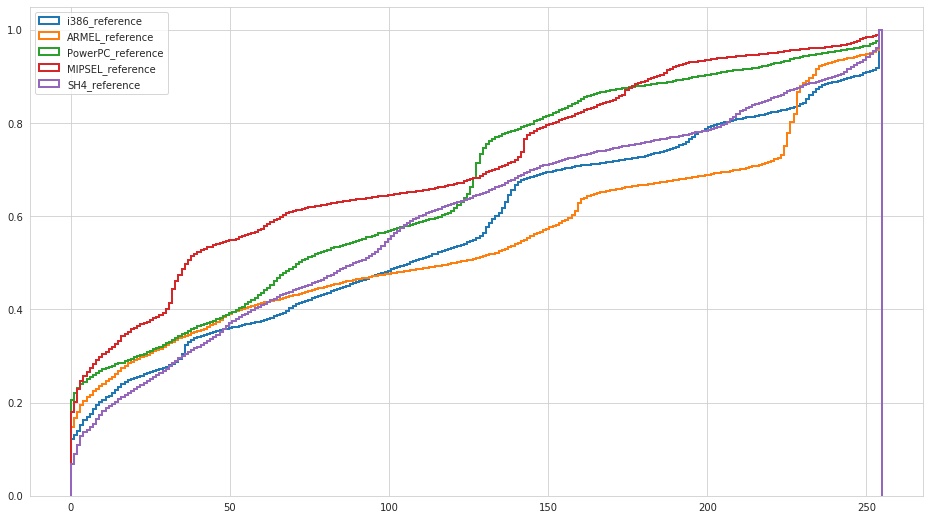

In [45]:
_32_bit = {x:reference_dict[x] for x in ['i386_reference', 'ARMEL_reference', 'PowerPC_reference', 'MIPSEL_reference', 'SH4_reference']}
plot_distributions(_32_bit)

<h2>64-bit</h2>

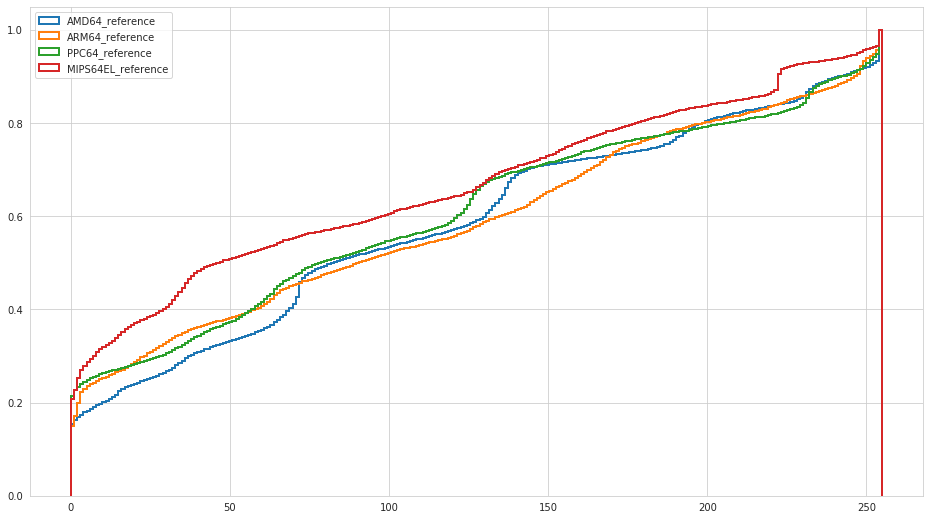

In [47]:
_64_bit = {x:reference_dict[x] for x in ['AMD64_reference', 'ARM64_reference', 'PPC64_reference', 'MIPS64EL_reference']}
plot_distributions(_64_bit)